# Explore here

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [26]:
# Your code here
import os

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')

df


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [28]:
df['date'] = pd.to_datetime(df['date'])

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    366 non-null    datetime64[ns]
 1   sales   366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [30]:
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [31]:
df.index = df['date'].dt.date

In [32]:
df

,date,sales
date,,
2022-09-03,2022-09-03 17:10:08.079328,55.292157
2022-09-04,2022-09-04 17:10:08.079328,53.803211
2022-09-05,2022-09-05 17:10:08.079328,58.141693
2022-09-06,2022-09-06 17:10:08.079328,64.530899
2022-09-07,2022-09-07 17:10:08.079328,66.013633
...,...,...
2023-08-30,2023-08-30 17:10:08.079328,989.600354
2023-08-31,2023-08-31 17:10:08.079328,994.987326
2023-09-01,2023-09-01 17:10:08.079328,995.814415


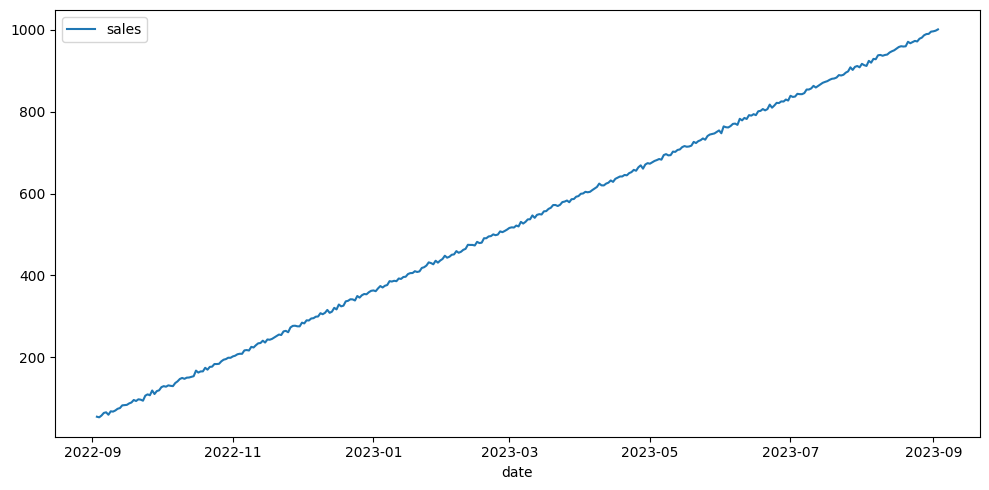

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)

plt.tight_layout()

plt.show()

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, period = 30)
decomposition

TypeError: float() argument must be a string or a real number, not 'Timestamp'

In [ ]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

NameError: name 'decomposition' is not defined

In [ ]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

NameError: name 'decomposition' is not defined

In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(df)

In [ ]:
ruido = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = ruido)

plt.tight_layout()

plt.show()

In [ ]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = df)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [ ]:
fig = decomposition.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plot_acf(df)

plt.tight_layout()

plt.show()

In [ ]:
df.index = pd.to_datetime(df.index)
train = df.loc[:'2023-08-03']
test = df.loc['2023-08-04':]

In [ ]:
train

In [ ]:
from pmdarima import auto_arima

model = auto_arima(train, seasonal = False, trace = True)

In [ ]:
test.info()

In [ ]:
model.summary()

In [ ]:
mes_predicho = model.predict(31)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test,mes_predicho)

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = test)
sns.lineplot(data = mes_predicho)

plt.tight_layout()

plt.show()